# Лабораторная работа №2
`предобработка данных`

`Дочкоч Роман 13 группа 3 курс`

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder(sparse=False)

### Загружаю тренеровочные и тестовые данные 

In [2]:
data = pd.read_csv(r'dataset_titanic.csv')
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'male' else 0)

In [3]:
#train_data.head()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### узнаю какие столбцы имеют пустые значения

In [4]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

### создал столбец для кодировки Cabin

In [5]:
le.fit(data['Cabin'])
print(data['Cabin'].nunique())
data['Cabin_le']  = le.transform(data['Cabin'])
data.head(6)

147


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_le
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,147
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,147


### Из таблицы корреляции видно что Возраст можно заполнить ссылаясь на Fare, Survived, Pclass

<AxesSubplot:>

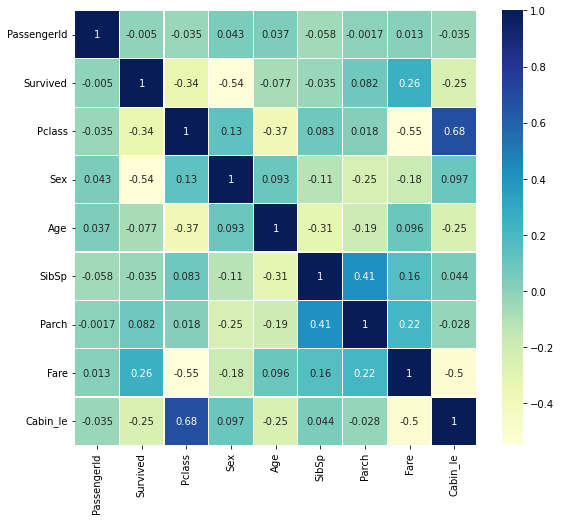

In [6]:
corrmat = data.corr()  

_, ax = plt.subplots(figsize =(9, 8))

sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True,)

### График возрастов

<AxesSubplot:xlabel='Age', ylabel='Count'>

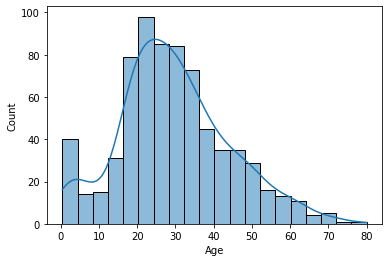

In [7]:
sns.histplot(data['Age'], kde=True)

### Создаю тренировочные и тестовую выборки
заполнил пустые Age на средние по Pclass.

In [8]:
s_data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
new_ohe_features = ohe.fit_transform(data['Embarked'].values.reshape(-1,1))
tmp = pd.DataFrame(new_ohe_features, columns=['Emb=' + str(i) for i in range(new_ohe_features.shape[1])])
s_data = pd.concat([s_data, tmp],axis=1)

print(f's_data = {s_data.shape}')

_, test_data = train_test_split(s_data.dropna(), test_size=0.4)
train_data = s_data.drop(index=test_data.index)
cut_train_data = train_data.dropna()

#заполняем train_data
ages = train_data['Pclass'].map(train_data.groupby('Pclass')['Age'].mean())
train_data['Age'].fillna(ages, inplace=True)

print(f'test_data = {test_data.shape}')
print(f'train_data = {train_data.shape}')
print(f'cut_train_data = {cut_train_data.shape}')
s_data.head()

s_data = (891, 9)
test_data = (286, 9)
train_data = (605, 9)
cut_train_data = (428, 9)


,Pclass,Sex,Age,Fare,Survived,Emb=0,Emb=1,Emb=2,Emb=3
0,3,1,22.0,7.2500,0,0.0,0.0,1.0,0.0
1,1,0,38.0,71.2833,1,1.0,0.0,0.0,0.0
2,3,0,26.0,7.9250,1,0.0,0.0,1.0,0.0
3,1,0,35.0,53.1000,1,0.0,0.0,1.0,0.0
4,3,1,35.0,8.0500,0,0.0,0.0,1.0,0.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

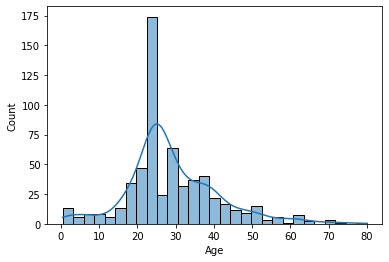

In [9]:
sns.histplot(train_data['Age'], kde=True)

# Выброшенный датасет

In [42]:
X, y = cut_train_data[['Pclass', 'Sex', 'Age', 'Fare']], cut_train_data[['Survived']]
X_test, y_test = test_data[['Pclass', 'Sex', 'Age', 'Fare']], test_data[['Survived']]

## KNN

In [199]:
neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(X.values, y.values.ravel())

KNeighborsClassifier(n_neighbors=50)

In [200]:
y_predicted = neigh.predict(X_test.values)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [201]:
knn_cut = accuracy_score(y_test.values, y_predicted)
knn_cut

0.5894245723172629

## KNN - normalize

In [202]:
X_norm, y_norm = scaler.fit_transform(X), y
X_test_norm, y_test_norm = scaler.fit_transform(X_test), y_test

In [203]:
neigh.fit(X_norm, y_norm.values.ravel())

KNeighborsClassifier(n_neighbors=50)

In [204]:
y_predicted_norm = neigh.predict(X_test_norm)
y_predicted_norm

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [205]:
knn_cut_norm = accuracy_score(y_test_norm, y_predicted_norm)
knn_cut_norm

0.7729393468118196

## DecisionTreeClassifier

In [178]:
d_tree = DecisionTreeClassifier( criterion='gini', max_depth=3, min_samples_leaf=20, random_state=0)

d_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=0)

In [179]:
y_predicted = d_tree.predict(X_test)
y_predicted

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [180]:
tree_cut = accuracy_score(y_test.values, y_predicted)
tree_cut

0.7884914463452566

## DecisionTreeClassifier - normalize

In [181]:
d_tree.fit(X_norm, y_norm)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=0)

In [182]:
y_predicted_norm = d_tree.predict(X_test_norm)
y_predicted_norm

C:\Users\Рома\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [183]:
tree_cut_norm = accuracy_score(y_test_norm, y_predicted_norm)
tree_cut_norm

0.7884914463452566

## Заполненый датасет

### KNN

In [206]:
X, y = train_data[['Pclass', 'Sex', 'Age', 'Fare']], train_data[['Survived']]

In [207]:
neigh.fit(X.values, y.values.ravel())

KNeighborsClassifier(n_neighbors=50)

In [208]:
y_predicted = neigh.predict(X_test.values)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [209]:
knn = accuracy_score(y_test.values, y_predicted)
knn

0.5894245723172629

### KNN - normalize

In [210]:
X_norm, y_norm = scaler.fit_transform(X), y

In [211]:
neigh.fit(X_norm, y_norm.values.ravel())

KNeighborsClassifier(n_neighbors=50)

In [212]:
y_predicted_norm = neigh.predict(X_test_norm)
y_predicted_norm

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [213]:
knn_norm = accuracy_score(y_test_norm, y_predicted_norm)
knn_norm

0.7729393468118196

### DecisionTreeClassifier

In [192]:
d_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=0)

In [193]:
y_predicted = d_tree.predict(X_test)
y_predicted

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [194]:
tree = accuracy_score(y_test.values, y_predicted)
tree

0.7884914463452566

### DecisionTreeClasifier - normalize

In [195]:
d_tree.fit(X_norm, y_norm)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=0)

In [196]:
y_predicted_norm = d_tree.predict(X_test_norm)
y_predicted_norm

C:\Users\Рома\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [197]:
tree_norm = accuracy_score(y_test_norm, y_predicted_norm)
tree_norm

0.7884914463452566

In [214]:
df = pd.DataFrame([['Обрезан',knn_cut,knn_cut_norm,tree_cut,tree_cut_norm],
                  ['Добавление',knn,knn_norm,tree,tree_norm]]
                  , columns=['Тип', 'Knn','Knn-norm', 'Tree', 'Tree-norm'])
df.head()

,Тип,Knn,Knn-norm,Tree,Tree-norm
0,Обрезан,0.589425,0.772939,0.788491,0.788491
1,Добавление,0.589425,0.772939,0.788491,0.788491


## Вывод 
По этой таблице можно сказать что нормализация данных помогает а мое заполнение данными нет)

In [168]:
def my_diff(klassifier,cut_X_train, cut_y_train, X_train, y_train, X_test, y_test):
    cut_y_predicted = klassifier.fit(cut_X_train, cut_y_train).predict(X_test) 
    y_predicted = klassifier.fit(X_train, y_train).predict(X_test) 
    
    return accuracy_score(y_test, y_predicted) - accuracy_score(y_test, cut_y_predicted)

In [169]:
from statistics import mean
import warnings
import time

Test_dataset = 100
mean_arry = []

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for j in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:
        knn_diff_array = []
        tree_diff_array = []
        start_time = time.time()
        for i in range(Test_dataset):
            _, test_data = train_test_split(s_data.dropna(), test_size=j)
            train_data = s_data.drop(index=test_data.index)
            cut_train_data = train_data.dropna()

            #заполняем train_data
            ages = train_data['Pclass'].map(train_data.groupby('Pclass')['Age'].mean())
            train_data['Age'].fillna(ages, inplace=True)

            cut_X, cut_y = cut_train_data[['Pclass', 'Sex', 'Age', 'Fare']], cut_train_data[['Survived']]
            X, y = train_data[['Pclass', 'Sex', 'Age', 'Fare']], train_data[['Survived']]
            X_test, y_test = test_data[['Pclass', 'Sex', 'Age', 'Fare']], test_data[['Survived']]

            knn_diff_array.append(my_diff(neigh, scaler.fit_transform(cut_X), cut_y, X, y, X_test, y_test))
            tree_diff_array.append(my_diff(d_tree, cut_X, cut_y, X, y, X_test, y_test))    
    
        print(f'test_size =  {j}')
        print(f'\tknn_dif = {mean(knn_diff_array)}')
        print(f'\ttree_dif = {mean(tree_diff_array)}')
        print(f'\tTest_dataset size: {Test_dataset}')
        print("--- %s seconds ---" % (time.time() - start_time))
        mean_arry.append(mean(knn_diff_array))

test_size =  0.1
	knn_dif = 0.003472222222222222
	tree_dif = 0.00291666666666667
	Test_dataset size: 100
--- 2.9474101066589355 seconds ---
test_size =  0.2
	knn_dif = 0.004685314685314689
	tree_dif = 0.006923076923076925
	Test_dataset size: 100
--- 3.1045432090759277 seconds ---
test_size =  0.3
	knn_dif = 0.003627906976744183
	tree_dif = 0.009860465116279069
	Test_dataset size: 100
--- 3.7094650268554688 seconds ---
test_size =  0.4
	knn_dif = -0.0011888111888111918
	tree_dif = 0.008566433566433572
	Test_dataset size: 100
--- 3.6977062225341797 seconds ---
test_size =  0.5
	knn_dif = -0.009831932773109243
	tree_dif = 0.00686274509803922
	Test_dataset size: 100
--- 5.8725316524505615 seconds ---
test_size =  0.6
	knn_dif = -0.014149184149184155
	tree_dif = 0.013939393939393939
	Test_dataset size: 100
--- 5.025720834732056 seconds ---
test_size =  0.7
	knn_dif = 0.000800000000000024
	tree_dif = 0.013340000000000008
	Test_dataset size: 100
--- 5.6408491134643555 seconds ---
test_size = 

[0.003472222222222222,
 0.004685314685314689,
 0.003627906976744183,
 -0.0011888111888111918,
 -0.009831932773109243,
 -0.014149184149184155,
 0.000800000000000024,
 -0.01027972027972027,
 0.01934681181959564]

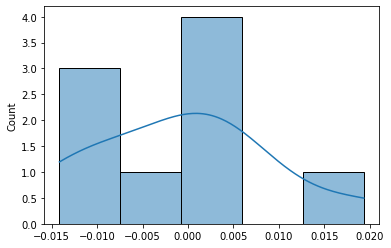

In [170]:
sns.histplot(mean_arry, kde=True)
mean_arry